In [22]:
# Required imports
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# Create a small SQLite database with a sales table 
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create sales table and insert sample data
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

In [24]:
# Insert sample data
cursor.executemany("""
    INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
""", [
    ("Product A", 10, 5.99),
    ("Product B", 20, 3.49),
    ("Product C", 15, 7.99),
    ("Product A", 5, 5.99),
    ("Product B", 10, 3.49)
])

In [25]:
# Commit changes
conn.commit()

# Step 2: Run an SQL query to fetch total quantity and revenue for each product
query = """
    SELECT 
        product, 
        SUM(quantity) AS total_qty, 
        SUM(quantity * price) AS revenue
    FROM sales
    GROUP BY product
"""
df = pd.read_sql_query(query, conn)


In [26]:
# Print results
print("Sales Summary:")
print(df)

Sales Summary:
     product  total_qty  revenue
0  Product A         90    539.1
1  Product B        180    628.2
2  Product C         90    719.1


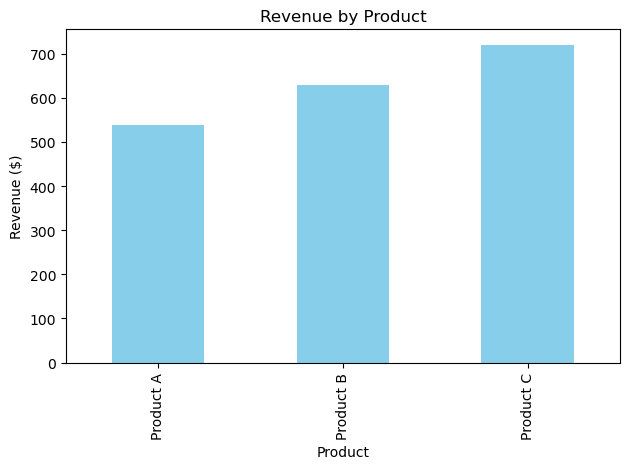

In [27]:
#Plot a bar chart for revenue by product
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()

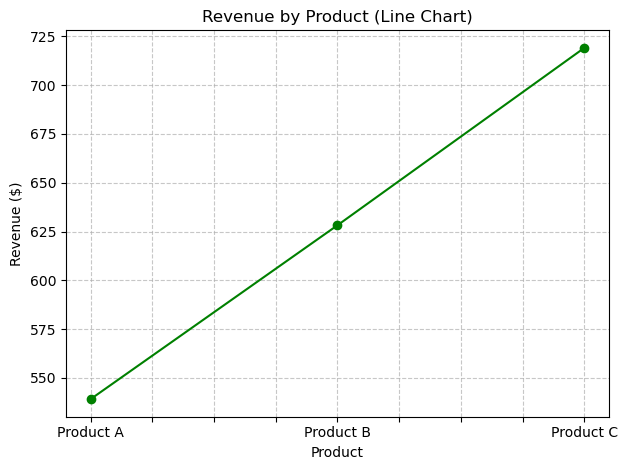

In [28]:
# Plot a line chart for revenue by product
df.plot(kind='line', x='product', y='revenue', marker='o', color='green', legend=False)
plt.title("Revenue by Product (Line Chart)")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

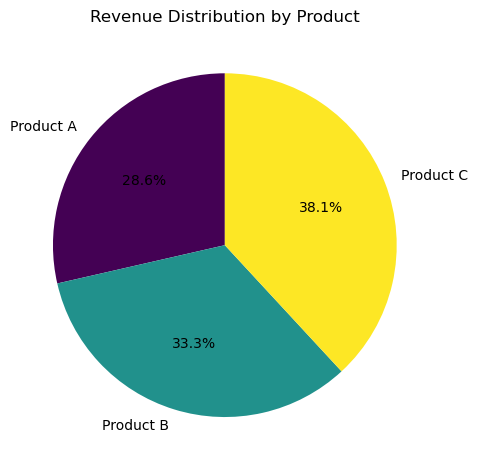

In [29]:
# Plot a pie chart for revenue by product
df.set_index('product', inplace=True)  # Set 'product' as the index for better pie chart labels
df['revenue'].plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='viridis')
plt.title("Revenue Distribution by Product")
plt.ylabel("")  # Remove the default y-axis label
plt.tight_layout()
plt.show()

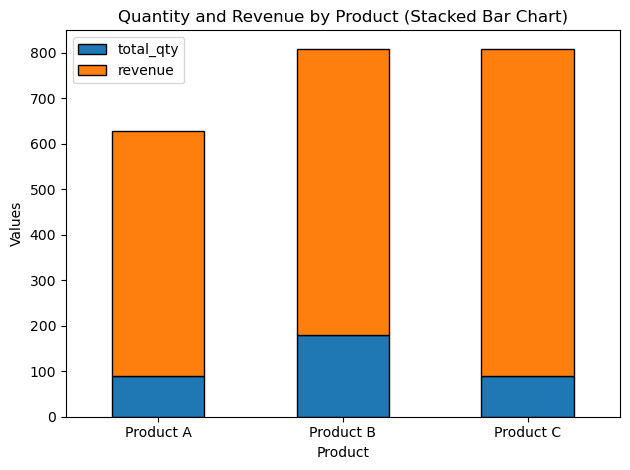

In [30]:
#Stacked Bar Chart
df[['total_qty', 'revenue']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title("Quantity and Revenue by Product (Stacked Bar Chart)")
plt.xlabel("Product")
plt.ylabel("Values")
plt.xticks(range(len(df)), df.index, rotation=0)
plt.tight_layout()
plt.show()


C:\Users\suhas\AppData\Local\Temp\ipykernel_9344\1905507011.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (df['total_qty'][i], df['revenue'][i]))


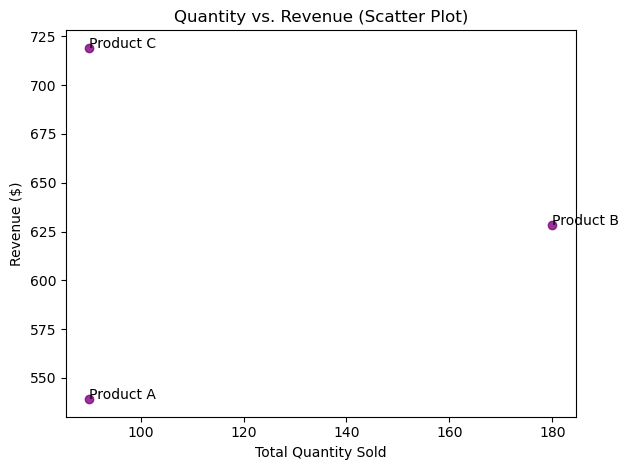

In [31]:
# Scatter Plot (Quantity vs. Revenue)
plt.scatter(df['total_qty'], df['revenue'], color='purple', alpha=0.8)
for i, txt in enumerate(df.index):
    plt.annotate(txt, (df['total_qty'][i], df['revenue'][i]))
plt.title("Quantity vs. Revenue (Scatter Plot)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

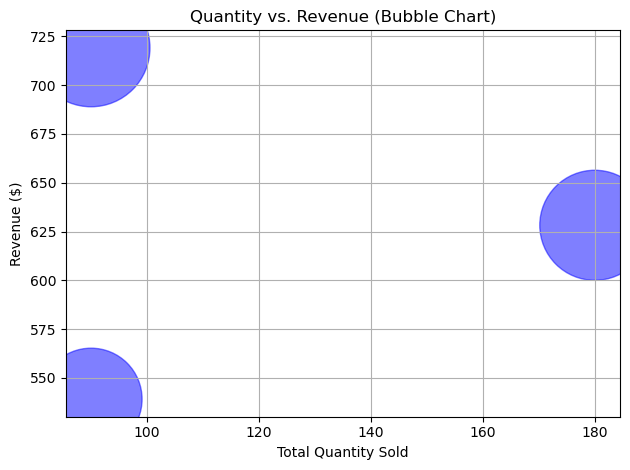

In [42]:
#Bubble Chart
plt.scatter(df['total_qty'], df['revenue'], s=df['revenue'] * 10, alpha=0.5, color='blue')
plt.title("Quantity vs. Revenue (Bubble Chart)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\suhas\AppData\Local\Temp\ipykernel_9344\3529693259.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().set_visible(False)  # Hide legend as it's redundant


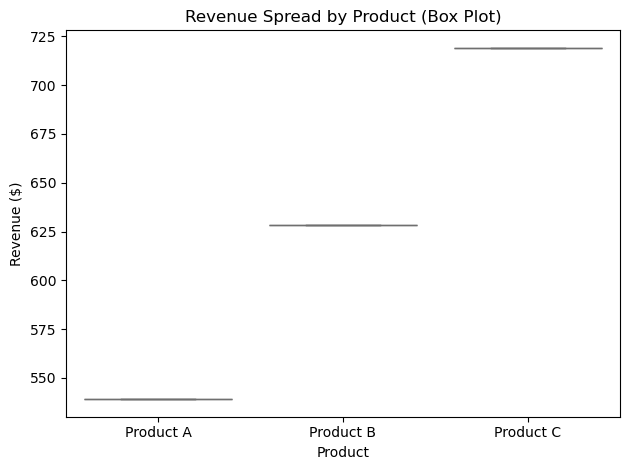

In [43]:
#Box Plot (Revenue Spread)
import seaborn as sns

sns.boxplot(data=df, x='product', y='revenue', hue='product', palette='pastel', dodge=False)
plt.title("Revenue Spread by Product (Box Plot)")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.legend().set_visible(False)  # Hide legend as it's redundant
plt.tight_layout()
plt.show()

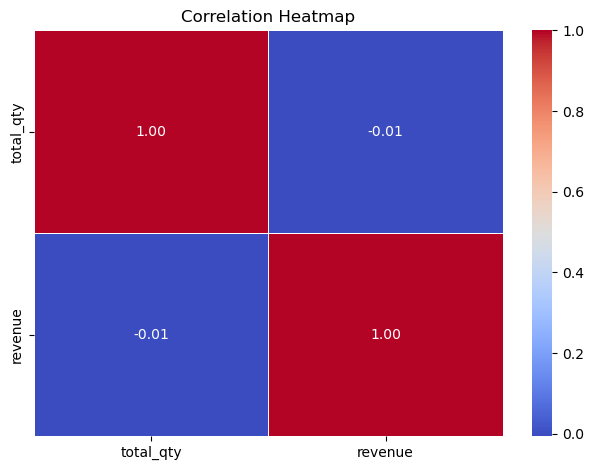

In [44]:
#Heatmap (Correlation)

import seaborn as sns

# Calculate correlations
correlation_matrix = df[['total_qty', 'revenue']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


In [45]:
# Close the database connection
conn.close()
